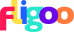

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**
- During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
- In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - Feature extraction: Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
  - Machine Learning modeling: at least one fitted model with the given data. You could use the `children` column as target.
- Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Dockerfile to setup environment / Conda environment for isolation.
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.


## Part I - Exploratory Data Analisys

In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import descriptive_statistics, type_and_missings
from my_processing import features_and_target

hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

We carry out a first inspection of the database, evaluating the format of the 
variables and the existence of missing values

In [29]:
#We use our function type_and_missings, saved in statistics module, to carry out
#our first inspection of the dataset
initial_inspection = type_and_missings(hotels)

print(initial_inspection['Tipos de datos']) 
print(initial_inspection['Valores faltantes']) 

hotel                              object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
average_daily_rate                float64
required_car_parking_spaces        object
total_of_special_requests           int64
arrival_date                       object
dtype: object
hotel               

First, we note that there is some variables that are categoric and has object format. We will need to modify the format, to be able to use them in posterior analysis. Regarding missing values, country column has 289 missing values. It is the only variable with missing values. Depending on the importance of this column, we could impute these values or remove the rows if the amount of missing data is manageable. Since I consider is not relevant in our analysis, we don't care about it.

In [30]:
# Consistency check on categorical data. We review unique categories
#in some key categorical columns. In this way, we check if there are variations
# in spelling
unique_values={}
for variable in hotels.columns[:-1:]:
    if hotels[variable].dtype== 'object' and (not variable=='arrival date'):
        unique_values[variable]=hotels[variable].unique()
        
print(unique_values)
        
# We express the categorical variables numerically, in case we (potentially) need 
#them in the subsequent analysis.
hotels['hotel'] = hotels['hotel'].replace({'City_Hotel': 1, 'Resort_Hotel': 0})
hotels['children'] = hotels['children'].replace({'children': 1, 'none': 0})
hotels['required_car_parking_spaces'] = hotels['required_car_parking_spaces'].replace({'parking': 1, 'none': 0})

{'hotel': array(['City_Hotel', 'Resort_Hotel'], dtype=object), 'children': array(['none', 'children'], dtype=object), 'meal': array(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype=object), 'country': array(['DEU', 'PRT', 'GBR', 'ROU', 'ESP', 'FRA', 'NLD', nan, 'CN', 'ITA',
       'BEL', 'HRV', 'IRL', 'NOR', 'AUT', 'FIN', 'ISR', 'USA', 'RUS',
       'AGO', 'CHL', 'SWE', 'POL', 'CHE', 'COL', 'BRA', 'CHN', 'HUN',
       'KOR', 'NZL', 'DNK', 'MEX', 'AUS', 'CZE', 'LTU', 'GRC', 'TUR',
       'LVA', 'LCA', 'ARG', 'DMA', 'LUX', 'LBN', 'VEN', 'CIV', 'MLI',
       'JPN', 'OMN', 'THA', 'SRB', 'SVK', 'IDN', 'IND', 'GNB', 'UKR',
       'EST', 'SVN', 'CAF', 'DZA', 'KNA', 'MOZ', 'URY', 'CYP', 'VNM',
       'IRN', 'ALB', 'ARE', 'BLR', 'MAR', 'PHL', 'ECU', 'MLT', 'CUB',
       'BGR', 'EGY', 'SAU', 'BOL', 'TUN', 'NPL', 'PER', 'ISL', 'KAZ',
       'ASM', 'TWN', 'CMR', 'MAC', 'KWT', 'NGA', 'SUR', 'SGP', 'PRI',
       'TGO', 'BIH', 'TZA', 'KEN', 'ZAF', 'BWA', 'AZE', 'FRO', 'MYS',
       'CPV', 'CRI', 'STP', '

After that first inspection of the database, we perform descriptive statistics for continuous variables and binary variables. 

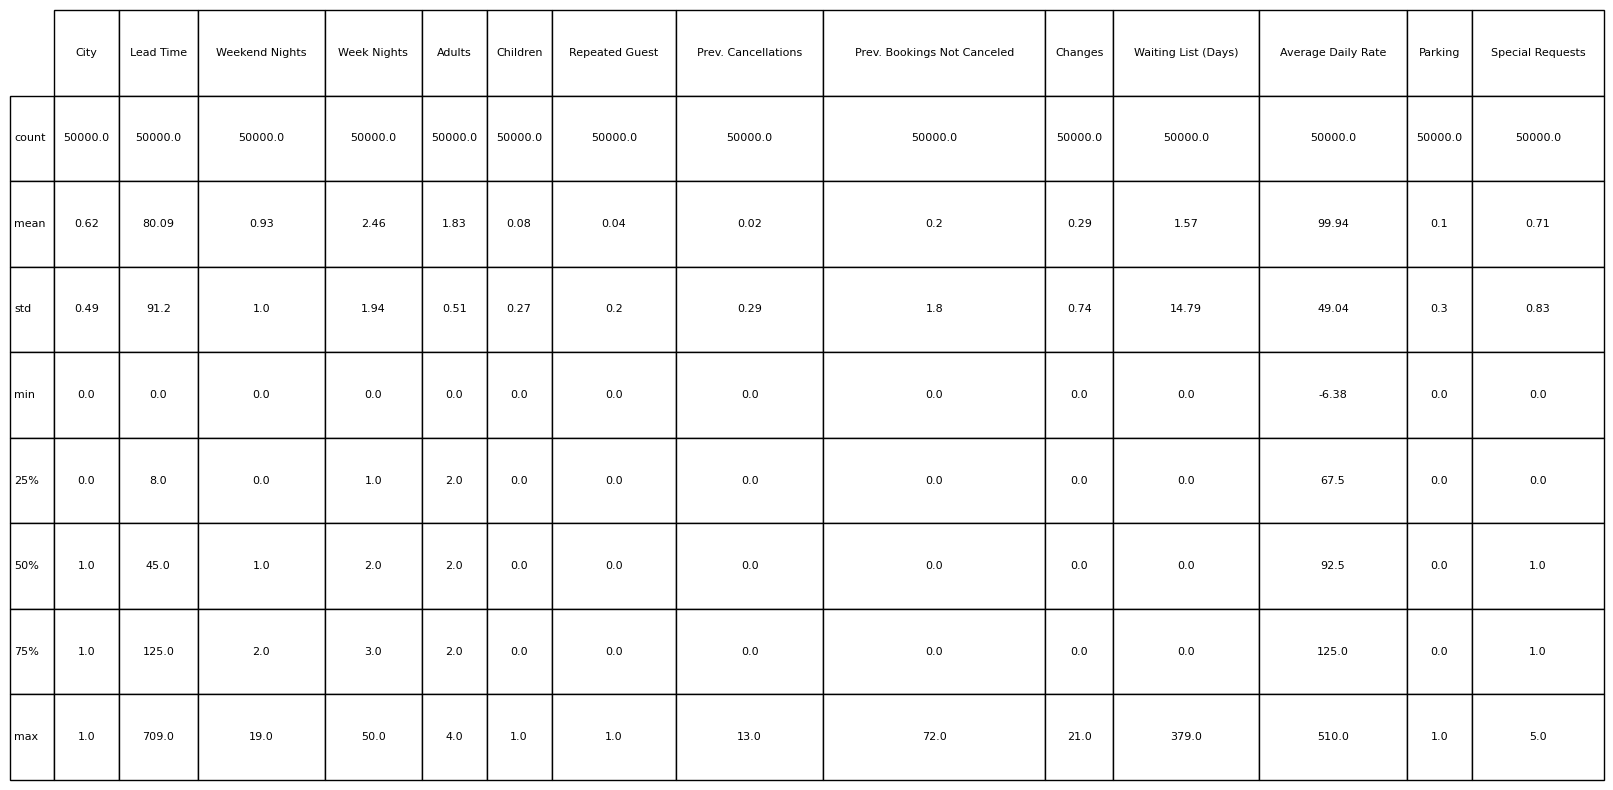

In [31]:
# Creating a list with the variables
variables=['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'is_repeated_guest', 'previous_cancellations',
           'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
           'average_daily_rate', 'required_car_parking_spaces', 
           'total_of_special_requests']

# Write better labels
column_labels = ['City', 'Lead Time', 'Weekend Nights', 'Week Nights',
                 'Adults', 'Children', 'Repeated Guest', 'Prev. Cancellations',
                 'Prev. Bookings Not Canceled', 'Changes', 'Waiting List (Days)',
                 'Average Daily Rate', 'Parking', 
                 'Special Requests']

#We use our function descriptive statistics function, saved in the statistics.py
#file, to build the descriptive statistics table
descriptive_statistics(hotels, variables, column_labels)

Descriptive statistics offer a snapshot of numerical variable distributions and categorical variable frequencies. Notably, 61% of the bookings within this dataset are for city hotels. Analysis reveals that reservations are typically made 80 days in advance, with an average daily rate of 100 units of currency. On average, bookings include one weekend day and two to three weekdays. A noteworthy 4% of bookings are by repeat guests, and around 10% include requests for parking spaces. The average booking involves approximately two adults—precisely 1.83—and a mere 8% of bookings are for stays with children, highlighting a significant disparity in the occurrence of child-inclusive stays. This imbalance warrants further investigation in the subsequent analysis phase.

The descriptive statistics table also sheds light on certain data anomalies. For example, the "average_daily_rate" variable has a minimum value of approximately -6, suggesting the presence of data entries with an illogical negative cost. It is recommended to exclude these anomalies from the dataset. Moreover, the presence of bookings with zero adults, some of which paradoxically include children, indicates irregular entries since children cannot book or travel unaccompanied by adults. It is advised to eliminate all entries from the dataset where the number of adults is zero.

In [32]:
#As indicated previously, I drop observations for which adults is equal to zero 
#and average_daily_rate is negative.
hotels = hotels[(hotels['adults'] != 0) & (hotels['average_daily_rate'] >= 0)]
'''This eliminates only 195 observations.''' 

#We create two new columns to calculate total number of days stayed and total cost
hotels['stays_nights_total']= hotels['stays_in_weekend_nights']+hotels['stays_in_week_nights']
hotels['total_cost']= hotels['stays_nights_total']*hotels['average_daily_rate']

We delve deeper into the analysis of the existence of Outliers. I select some key numeric variables for the outlier analysis. 

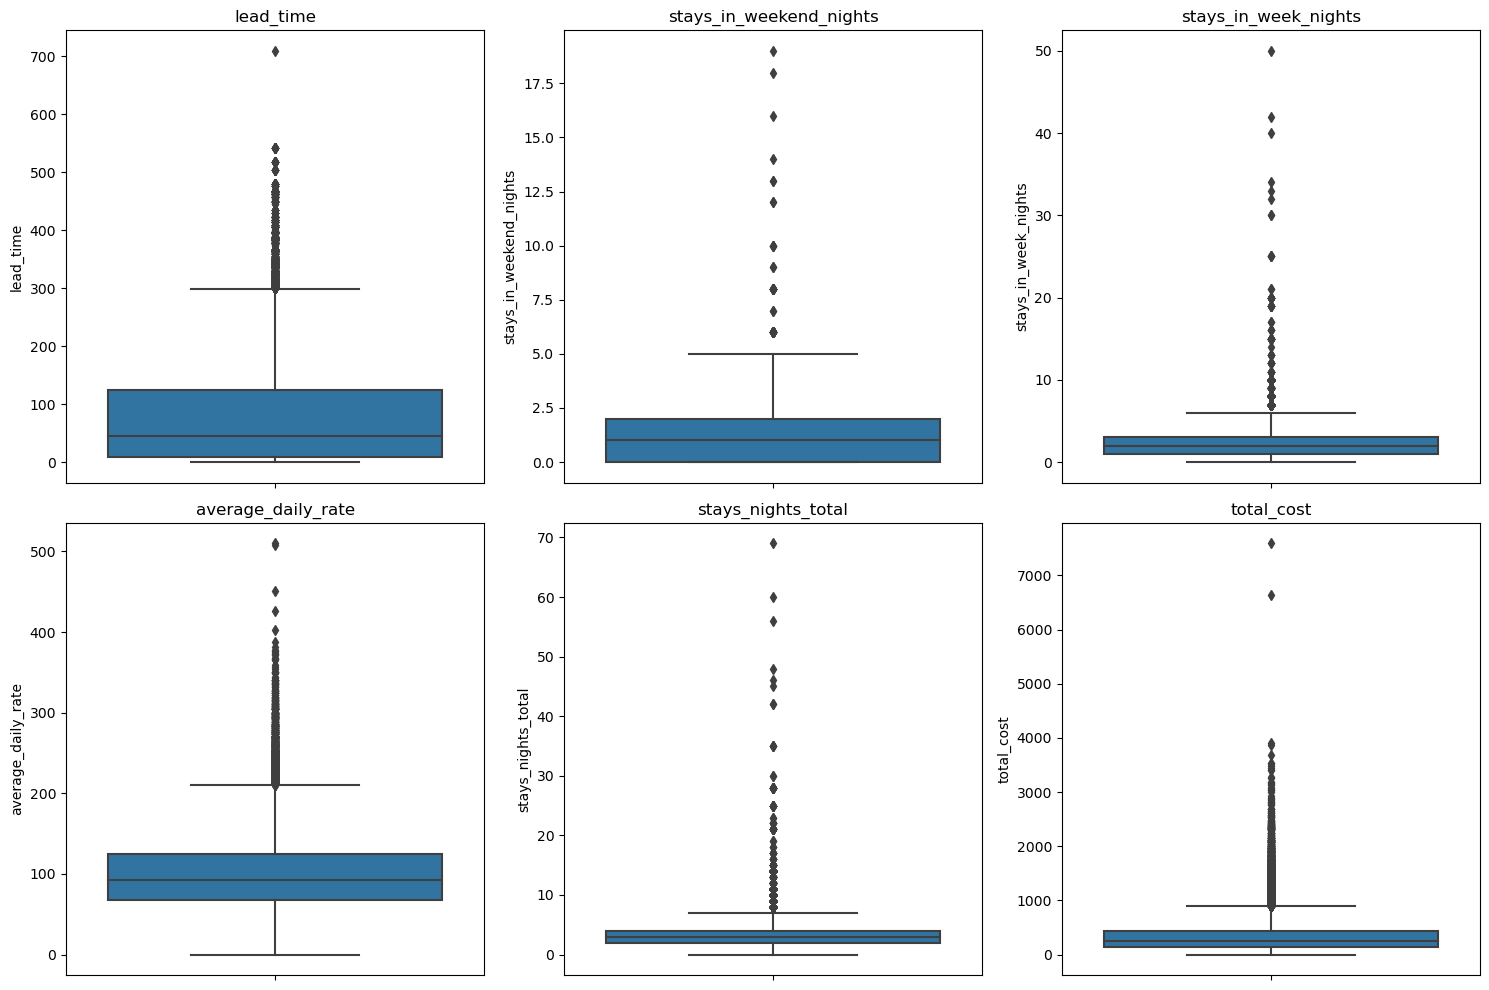

In [33]:
numeric_variables= ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                    'average_daily_rate', 'stays_nights_total','total_cost']

# We create a box plots for these variables
plt.figure(figsize=(15, 10))
for index, variable in enumerate(numeric_variables):
    plt.subplot(2, 3, index+1)
    sns.boxplot(y=hotels[variable])
    plt.title(variable)

plt.tight_layout()
plt.savefig('boxplots.png', dpi=300)
plt.show()

The outlier analysis involve generating box plots to visually identify outliers in some key variables. As we can see, the boxplots suggest the existence of reservations made with an extremely long lead time, unusually long stays, and atypically high average and total costs. The first panel, for example, shows that bookings made more than 300 days in advance are atypical values. These outliers could be legitimate and represent real cases, or they could be data errors.  Since we will be using this data for predictive models, outliers can have a significant impact on model performance. We could choose to remove outliers, cap them at a certain value, or keep them if they make sense in your analysis.

Let's consider the particular case of the advance time with which bookings are made. Intuitively, outliers look like measurement errors. Work trips, on the one hand, are planned a few days in advance. Vacations, on the other hand, although they are planned further in advance, can hardly be projected over a horizon longer than a year. A more in-depth analysis can investigate how these atypical data are distributed among the reservations that involve stays with children and without children. In this case, for the reason stated above, I would suggest setting the
lead_time variable to 365.

In addition, below, we present a map of correlations between the main variables of the database.

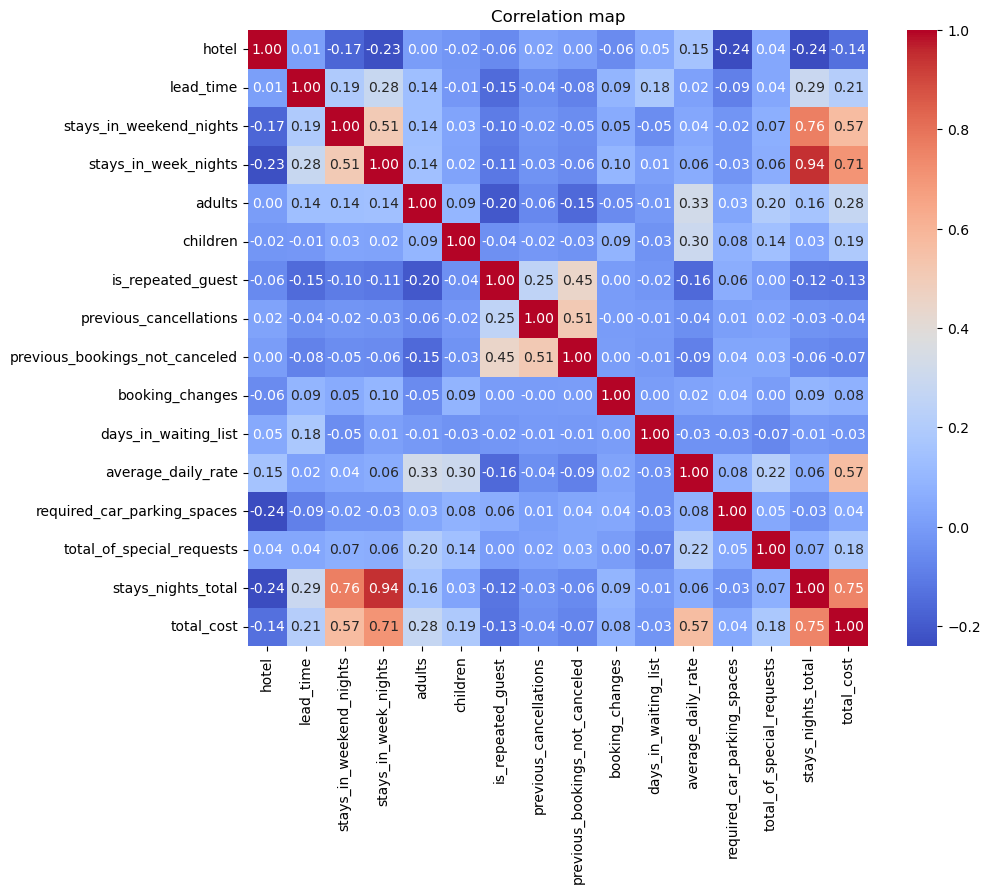

In [34]:
#Add children  to the numeric variables list
variables.append('stays_nights_total')
variables.append('total_cost')
# Calculate correlation matrix for all variables in  the list called "variables"
#and graph the correlation heath map
correlation_matrix = hotels[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation map")
plt.savefig('correlation_map.png', dpi=300)
plt.show()

The correlation heat map shows the relationships between numerical variables. Warmer and cooler hues indicate the strength and direction of the compensation between the variables. This analysis helps us understand how different booking characteristics may be related to each other.

These analyzes provide valuable insight into your data set and will allow us to make informed decisions about how to proceed with additional data analysis or cleaning. Most variables do not show a strong correlation with each other, indicating that they are quite independent. Most variables do not show a strong correlation with each other, indicating that they are quite independent. This is important for a predictive analysis, as it suggests that each variable captures different information. The highest correlations occur between the variables that were generated as transformations of other base variables and these generating variables.

In [35]:
#separting arrival day, month and year
hotels[['year', 'month', 'day']] = hotels['arrival_date'].str.split('-', expand=True)

hotels['year'] = hotels['year'].astype(int)
hotels['month'] = hotels['month'].astype(int)
hotels['day'] = hotels['day'].astype(int)

We consider important to investigate on how hotel income varies depending on whether reservations involve stays with or without children. For this purpose, we make a bar graph.

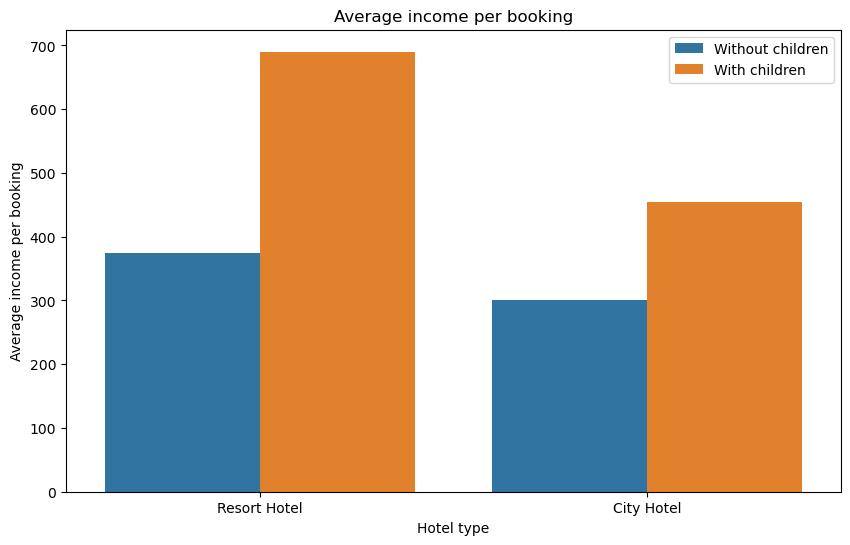

In [36]:
# We calculate the average income per reservation for each type of hotel and 
#depending on the presence of children
average_income_by_hotel_and_children = hotels.groupby(['hotel',
    'children'])['total_cost'].mean().reset_index() #reset_index() converts
#the result to a new DataFrame average_income_by_hotel_and_children, where each
#row is a unique combination of 'hotel' and 'has_children', with the corresponding
#average income.

#We create the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='total_cost', hue='children', data=average_income_by_hotel_and_children)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Without children', 'With children'])

plt.title('Average income per booking')
plt.xlabel('Hotel type')
plt.ylabel('Average income per booking')
plt.xticks(ticks=[0, 1], labels=['Resort Hotel', 'City Hotel'])
plt.savefig('income_barplot.png')
plt.show()

The graph illustrates that both the Resort Hotel and the City Hotel experience higher average revenue per reservation when children are included in the bookings compared to those without children. There can be several reasons for this phenomenon. Firstly, family trips often involve more individuals, resulting in higher overall expenditures. Additionally, during holidays, families tend to spend more on supplementary amenities such as dining, entertainment, and upgraded accommodations, leading to an increase in the average revenue per booking. Also, family trips usually take place at weekends or some special dates, when demand an prices are higher. This trend holds true for both types of hotels, suggesting that families could represent a profitable market for the hotel industry as a whole. However, it's worth noting that the difference is less pronounced for City Hotels, which are typically associated with business trips.

In order to analyze the reason for this difference more thoroughly, we present graphs to evaluate whether there are variations in the distribution of some characteristics in reservations with and without children.

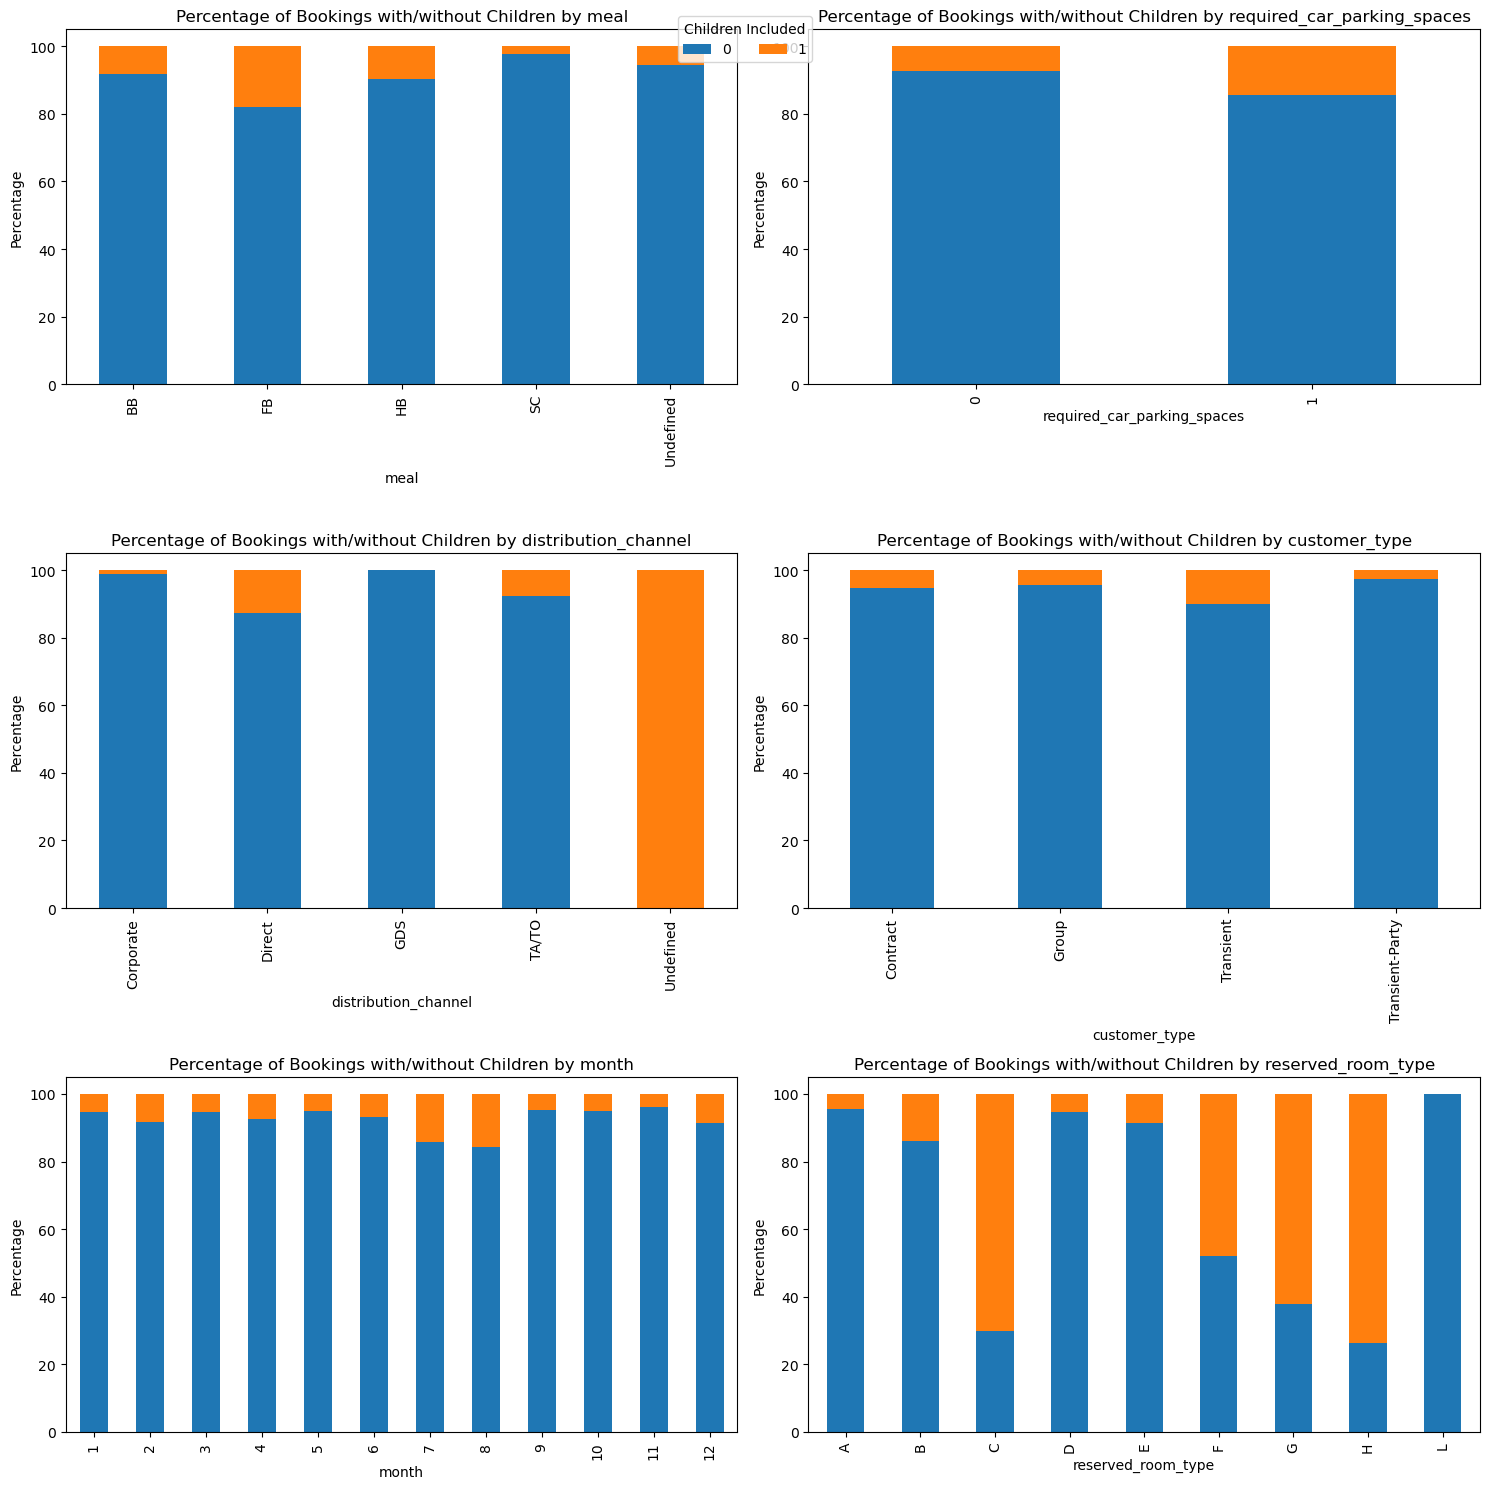

In [37]:
categoric_characteristics = ['meal', 'required_car_parking_spaces', 'distribution_channel', 
                             'customer_type', 'month', 'reserved_room_type']

fig, axes = plt.subplots(3, 2, figsize=(15, 15)) 
axes = axes.flatten() 

# We create a variable to manage the legend
handles, labels = None, None

for index, characteristic in enumerate(categoric_characteristics):
    # We obtain the data for each characteristic, separated by reservations with children and without children
    data = hotels.groupby([characteristic, 'children']).size().unstack(fill_value=0)
    
    # We calculate the percentage for each group
    data_percentage = data.divide(data.sum(axis=1), axis=0) * 100
    
    # We create the bar chart for each category
    ax = data_percentage.plot(kind='bar', ax=axes[index], stacked=True)
    
    # Setting titles and labels
    axes[index].set_title(f'Percentage of Bookings with/without Children by {characteristic}')
    axes[index].set_ylabel('Percentage')
    axes[index].set_xlabel(characteristic)
    
    # We save the legend handles of the last graph to use them globally
    if index == len(categoric_characteristics) - 1:
        handles, labels = ax.get_legend_handles_labels()

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Remove the individual legends from each subplot
for ax in axes:
    ax.get_legend().remove()

# We place a global legend for the entire figure
fig.legend(handles, labels, loc='lower center', title='Children Included', bbox_to_anchor=(0.5, 0.95), ncol=len(labels))
plt.savefig('categoric_characteristics_barplot.png')
plt.show()

Based on the bar charts, here is a concise interpretation highlighting key insights. The first panel indicates that bookings involving families with children have a higher incidence in the 'Full Board' category, which offers a complete meal service. This suggests that families may value the convenience and inclusivity of having all meals provided at the hotel, even if it comes at a higher cost.

The second panel reveals that bookings that include car parking requirements see a higher incidence of families with children. This could imply that traveling with children is often associated with the need for personal transportation, leading to a demand for parking spaces.

The fifth panel highlights a pronounced increase in bookings with children during July and August, aligning with summer vacation periods in Europe. This seasonal trend indicates a potential opportunity for targeted marketing and promotions aimed at families during these peak months.

The sixth panel shows a tendency for families with children to book room types C, G, and H. If these room types are characterized by features that make them more expensive, such as additional space or amenities conducive to family stays, this could explain the higher expenditure associated with bookings that include
children.

These insights reflect the specific needs and preferences of families when booking hotel stays, such as comprehensive meal plans, the necessity of car parking, and the desire for room types that cater to the comfort of a family. Hotels can leverage this data to enhance service offerings and tailor pricing strategies to attract
and accommodate families, ultimately driving revenue during key seasonal periods.

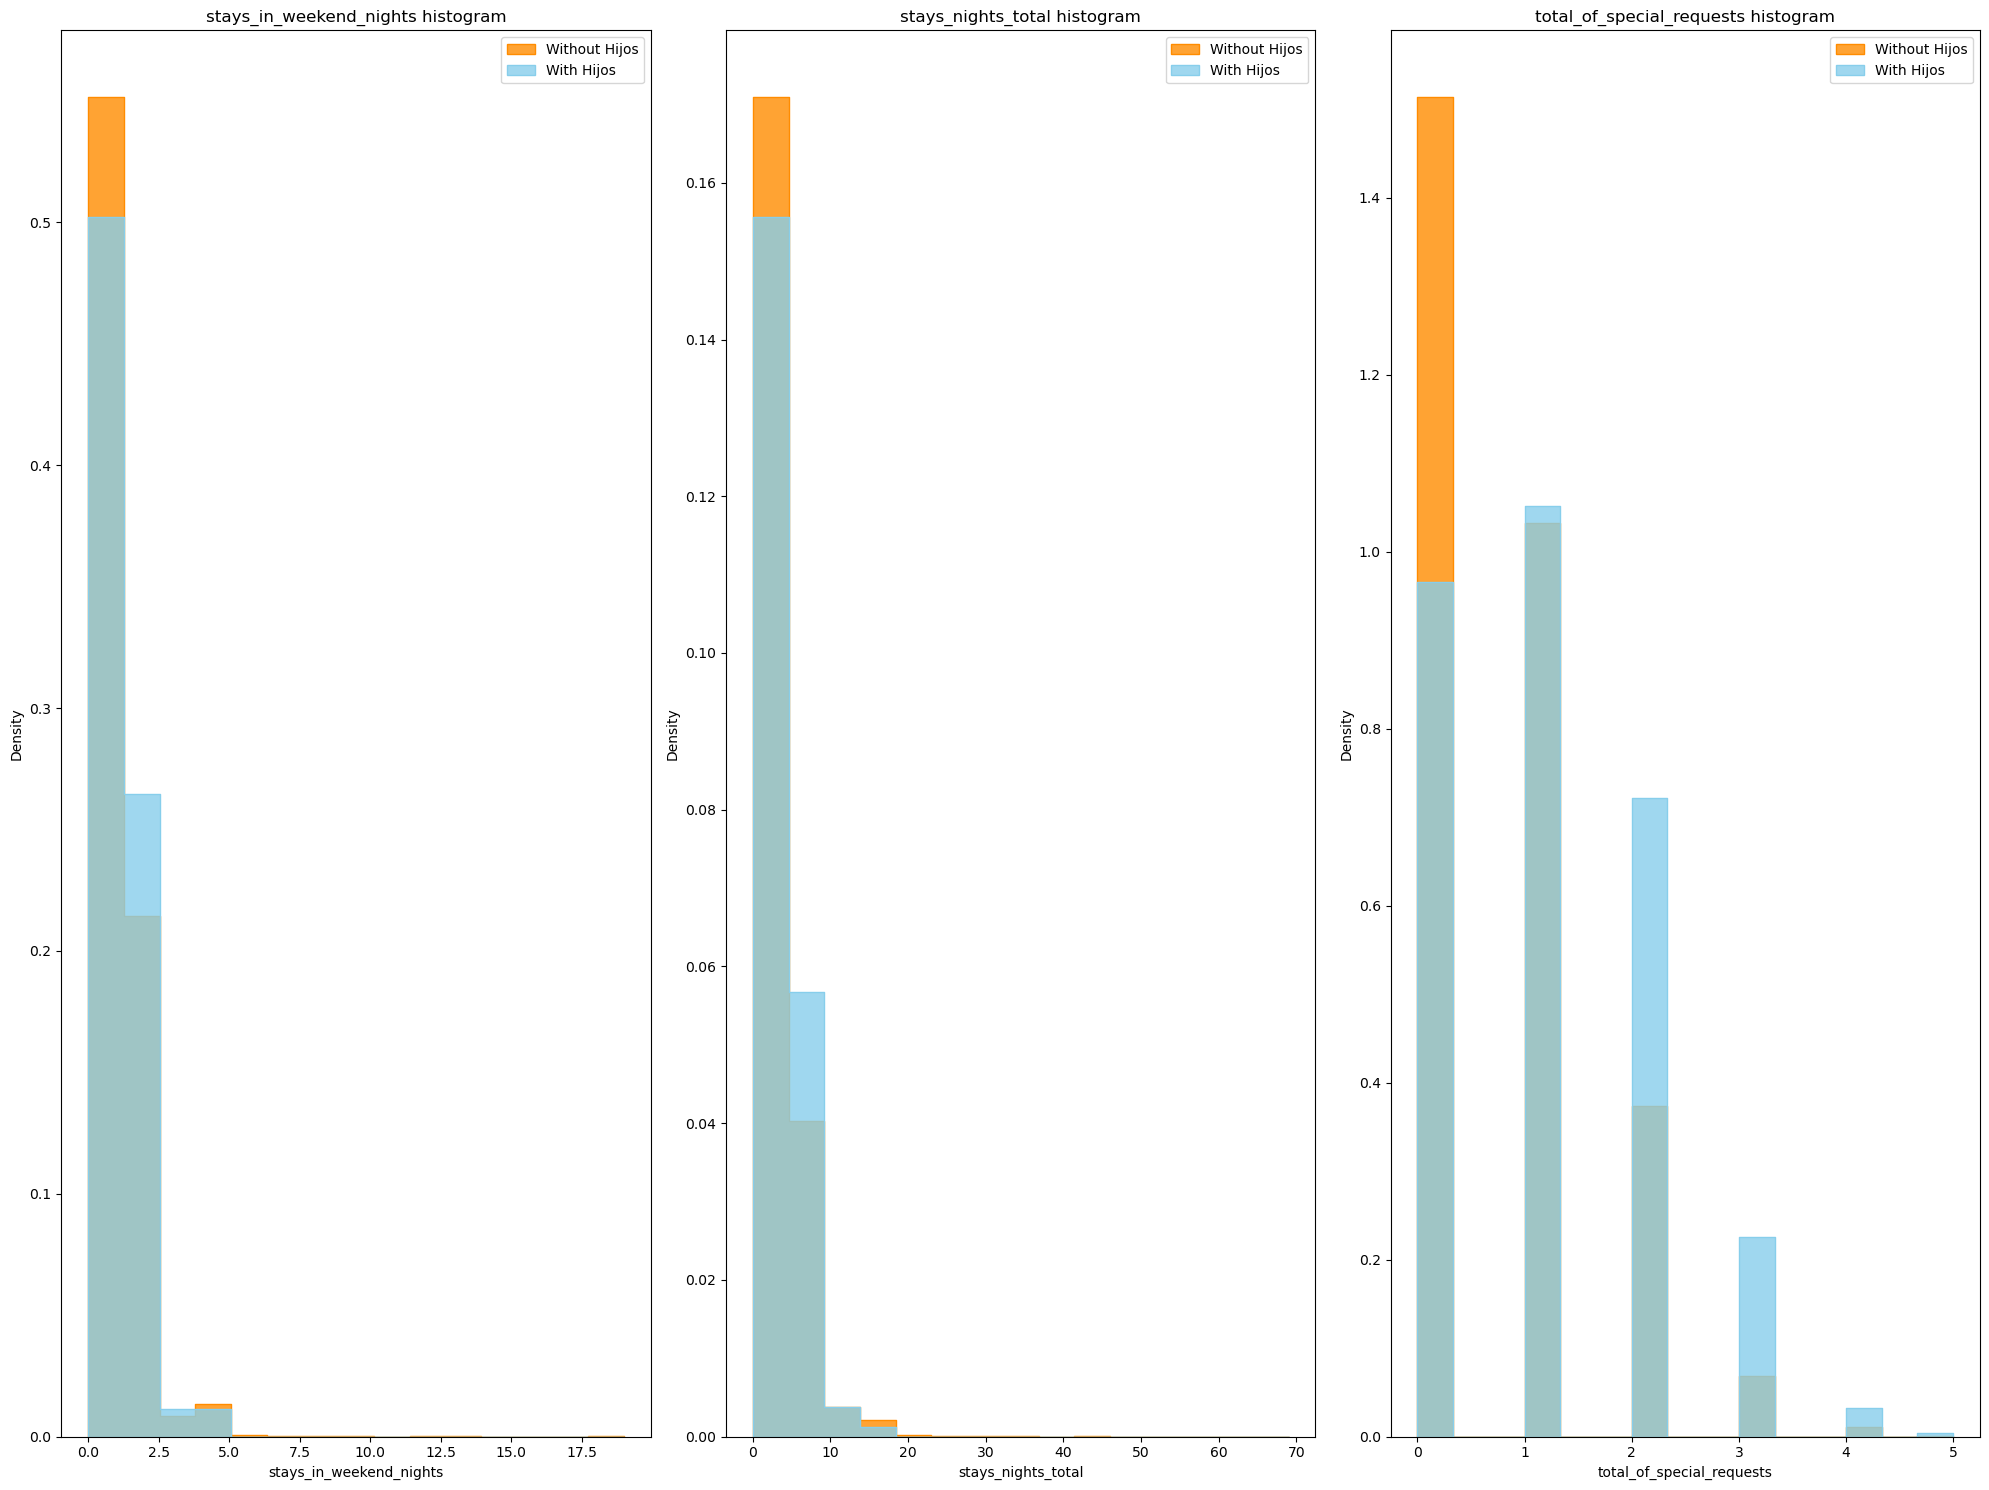

In [38]:
continuous_characteristics = ['stays_in_weekend_nights', 'stays_nights_total', 'total_of_special_requests']

# Configura el tamaño de la figura que contendrá todos los subplots
plt.figure(figsize=(20, 15))

# Crea subplots para cada una de las variables
for index, variable in enumerate(continuous_characteristics, 1):
    # Crea un subplot en la posición correspondiente
    ax = plt.subplot(1, 3, index)
    
    # Filtra los datos para reservas con hijos y sin hijos
    data_with_children = hotels[hotels['children'] > 0][variable]
    data_without_children = hotels[hotels['children'] == 0][variable]
    
    # Encuentra los valores máximos y mínimos para establecer los bins
    combined_data = pd.concat([data_with_children, data_without_children])
    min_val, max_val = combined_data.min(), combined_data.max()
    bins = np.linspace(min_val, max_val, 16)  # Asegúrate de tener 15 bins como en tu configuración original
    
    # Dibuja los histogramas para cada grupo en el mismo subplot
    sns.histplot(data_without_children, bins=bins, color='darkorange', kde=False, stat='density', 
                 label='Without Hijos', element='step', ax=ax, alpha=0.8)
    sns.histplot(data_with_children, bins=bins, color='skyblue', kde=False, stat='density', 
                 label='With Hijos', element='step', ax=ax, alpha=0.8)
    
    # Establece el título del subplot y los nombres de los ejes
    ax.set_title(f'{variable} histogram')
    ax.set_xlabel(variable)
    ax.set_ylabel('Density')

    # Muestra la leyenda
    ax.legend()

# Ajusta el layout para evitar la superposición de subplots
plt.tight_layout()
plt.savefig('continuous_characteristics_histogram.png')
# Muestra la figura con todos los subplots
plt.show()

From the first histogram we can see that reservations without children show a higher concentration of short stays in weekends, with the majority not exceeding one weekend night. On the other hand, bookings with children 
display a more uniform distribution, with a significant proportion extending to two and three nights. If weekend stays are more expensive, this may explain the differences that exist in the income of each of the types of reservations. It also implies that promoting weekend packages could be an effective strategy to attract families, while short-stay offers may be more appealing to guests without children.
    
The second panel shows a clear trend towards longer stays among bookings with children compared to those without, where stays tend to be shorter. Stays involving children often extend beyond a week, which may indicate planned family holidays. A leisure and pleasure trip, in turn, can explain a greater willingness to pay/spend.
    
Finally, from the third panel we can see bookings without children have a lower frequency special requests, which might indicate a more utilitarian or pragmatic approach to their stay.  Bookings with children often include at least one special request, which may reflect additional needs such as cribs,larger rooms, or special meal services. Since each of these requests are paid, they may help explain the higher average income generated by family trips
    
In this way, it may be interesting to develop and train a model to predict whether hotel stays have children or not. We do this in the next part. 

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In the descriptive statistics table, we can observe that there are reservations where the reported length of stay (stays_nights_total) is 0 days. We will assume that these bookings were cancelled. Since our interest lies in predicting whether a stay will include children or not, we will focus exclusively on non-cancelled bookings.
 
To define and train a prediction model we first must identify which variables (or transformations of them) could be useful to predict whether a stay included children/infants. We included variables following the logic that trips taken with children are less likely to be work trips.

 1) Lead Time: The time in advance with which the reservation is made could influence the probability of traveling with children. The trips that people take with children, in general, are related to leisure time. At the same time, the time in advance with which leisure trips are planned differs from business trips, for example. For this reason, although the correlation (see correlation map) is low, we include this variable

 2) Hotel Type (City or Resort): There could be a different trend in terms of traveling with children between these two types of hotels. In line with the previous argument, we could expect that reservations at the city hotel are more related to work and, therefore, the probability that it includes children is lower.

 3) Number of Adults: The number of adults on the reservation could be correlated with the presence of children since it is more likely that children travel with both parents, for example.

 4) Length of Stay: Both weekdays and weekends could have an influence. Work trips are typically made on weekdays. Weekend reservations are more likely to be family getaways.

 5) Type of Meal: Some types of meal plans may be more common in families with children.

 6) Customer Type: The type of customer could give us an idea about the probability of traveling with children.

 7) Market segment: We can also know the probability of traveling with children from the information on the market segment of the person who made the reservation.

 8) Required car parking spaces 
 
 9) Total of special Request

A binary classification model would be suitable for this purpose. We could consider models such as Logistic Regression, Decision Trees or Random Forest. We decide to use a logistic regression model, since it is the one we are most familiar with. Furthermore, in this context, logistic regression may have some advantages over other models. First, because they do not require constructing multiple trees, logistic regression models are usually faster to train than Random Forests, especially when working with large datasets. Second, when the feature set is relatively small and the relationship between the predictor variables and the outcome is roughly linear, logistic regression may outperform a Random Forest. Third, while Random Forests employ strategies like multiple tree generation and feature subsampling to mitigate overfitting, logistic regression inherently carries a reduced risk of this issue due to its simpler structure. 

The primary concern is the disparity within the sample between the quantity of bookings with children and those without, given that a mere 8% of the bookings in the sample include children. To remedy this issue, we consider two approaches: (1) employing stratified sampling to ensure proportional representation, and (2) applying class weighting to balance the influence of each group during model training.

In [39]:
# Filter out observations where the total number of nights stayed is greater than 0
hotels = hotels[hotels['stays_nights_total'] > 0]

# Define your features and target variable
features = ['lead_time', 'hotel', 'adults', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'stays_nights_total', 'total_cost', 'meal', 'customer_type', 'month']
target = 'children'

# Prepare the feature matrix X and target vector y
features = ['lead_time', 'hotel', 'adults', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'stays_nights_total', 'total_cost', 'meal', 'customer_type', 'month']
target = 'children'

X_final, y = features_and_target(hotels, features, target)

###### (1) #######
# Split the dataset into training and testing sets, using stratification to correct for imbalances
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Train a logistic regression model
model2 = LogisticRegression(random_state=42)
model2.fit(X_train2, y_train2)

# Make predictions on the testing set
y_pred2 = model2.predict(X_test2)

# Print the classification report
print('Stratification\n', classification_report(y_test2, y_pred2))

###### (2) #######
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Class weighting\n', classification_report(y_test, y_pred))


Stratification
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9094
           1       0.46      0.04      0.07       786

    accuracy                           0.92      9880
   macro avg       0.69      0.52      0.52      9880
weighted avg       0.89      0.92      0.89      9880

Class weighting
               precision    recall  f1-score   support

           0       0.97      0.70      0.81      9073
           1       0.18      0.75      0.29       807

    accuracy                           0.70      9880
   macro avg       0.58      0.73      0.55      9880
weighted avg       0.91      0.70      0.77      9880



The choice of the best model depends on our goals and the relative importance of precision, recall, and F1-score for our specific problem. Here is an analysis of both options:

1) Stratification:

- Precision for class 0 is high (0.92), indicating that when it predicts class 0, it is often correct.
- Recall for class 1 is very low (0.04), meaning the model identifies very few true positive cases.
- F1-score for class 1 is very low (0.07), indicating a low balance between precision and recall for class 1.
- The overall accuracy of the model is high (0.92), but this is due to a high 
number of true negatives (class 0).
- The weighted average precision is high (0.89) due to class imbalance, as most 
predictions fall into class 0.
- The macro average precision is moderate (0.69), but the macro average recall is low (0.52).

2) Class weighting :

- Precision for class 0 is high (0.97), indicating that when it predicts class 0,it is often correct.
- Recall for class 1 is high (0.75), meaning the model identifies a good proportion of true positive cases.
- F1-score for class 1 is moderate (0.29), indicating a reasonable balance between precision and recall for class 1.
- The overall accuracy of the model is moderate (0.70), and it is more balanced in terms of precision and recall between both classes.
- The weighted average precision is moderate (0.77).
- The macro average precision is moderate (0.58), and the macro average recall is high (0.73).

In summary, 2) appears to be more balanced in terms of precision and recall for both classes, and its F1-score for class 1 is higher compared to 1). Since, based on the exploratory analysis of Part I, we are interested in identifying stays that include families with children (as they are willing to spend more) to offer
them a more suitable package, we want to minimize the number of false negatives. In this sense, we want a high recall. For this reason, I consider that the most appropriate alternative is the one that uses class weighting.

## Part III - Results & Conclusions

In Part I of our exploratory analysis, we discovered that bookings including children are less common in these two hotels, representing only 8% of our sample. Nevertheless, these bookings generate significantly higher revenues, particularly in the resort-type hotel. In the city hotel, the difference in revenue among various types of bookings is smaller, due to its primary focus on business and corporate travel.

The inclusion of children in bookings is a key indicator for identifying family stays, which, as we will see, are characterized by a willingness to spend more on additional services and extended stays. We have observed that family bookings increase during the months of July and August, coinciding with the summer vacation in Europe. This suggests that trips with children differ in purpose and consequently in guest preferences. The data show that families often prefer complete meal packages (Full Board), specific room types (C, G, H), and frequently require parking. Moreover, bookings with children tend to be longer, which could explain the higher average revenue per booking.

These findings have direct implications for hotel business strategy. It would be beneficial for hotels to develop specific packages and promotions to attract families, especially during the summer months. They could also offer room options and services tailored to family needs, such as full meal services and child-friendly facilities.

To deepen this analysis, we developed a predictive model to forecast the presence of children or babies in stays. This model, which uses class weighting, achieves a better balance between precision and sensitivity, proving more effective in identifying stays with children. This model could be crucial in anticipating which non-cancelled bookings will include children, allowing hotels to proactively customize offers and services to enhance the customer experience and maximize revenue.

We believe that the model can be further improved with additional data and adjustments, such as the implementation of the LASSO method, to increase its precision.